/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8803 - loss: 0.4177 - val_accuracy: 0.9642 - val_loss: 0.1195
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9685 - loss: 0.1043 - val_accuracy: 0.9691 - val_loss: 0.1012
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9778 - loss: 0.0715 - val_accuracy: 0.9729 - val_loss: 0.0833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9834 - loss: 0.0509 - val_accuracy: 0.9790 - val_loss: 0.0723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9769 - val_loss: 0.0819


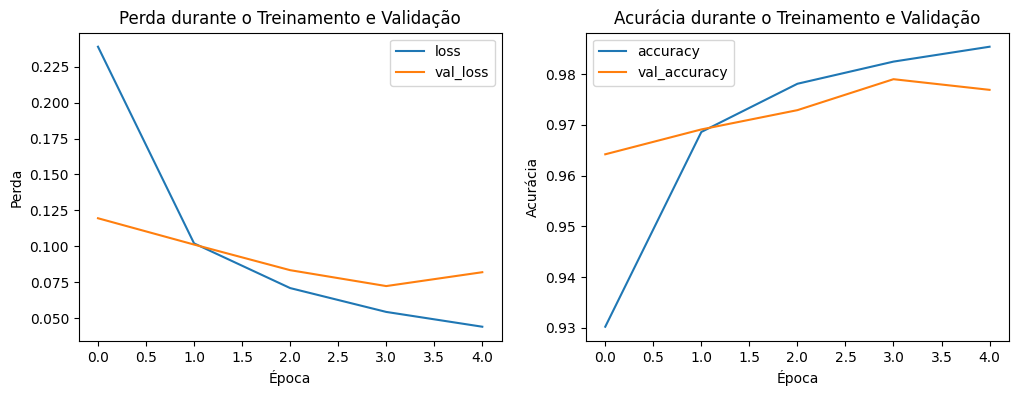

In [ ]:
# Algoritmo 1: Treinamento do Modelo

# Importando as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizando os dados de entrada
X_train = X_train / 255.0
X_test = X_test / 255.0

# Criando o modelo de rede neural
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (dígitos de 0 a 9)
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Salvando o modelo treinado para uso posterior
model.save('modelo_mnist.h5')

# Criando um DataFrame do pandas para as métricas de treinamento
history_df = pd.DataFrame(history.history)

# Plotando as métricas de treinamento usando Pandas e Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico da perda (loss)
history_df[['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Perda durante o Treinamento e Validação')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Perda')

# Gráfico da acurácia (accuracy)
history_df[['accuracy', 'val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Acurácia durante o Treinamento e Validação')
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Acurácia')

plt.show()


In [ ]:
# Algoritmo 2: Predição com o Modelo Treinado e Exibição de Métricas

# Importando as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np

# Carregando o conjunto de dados MNIST
(_, _), (X_test, y_test) = mnist.load_data()

# Normalizando os dados de entrada
X_test = X_test / 255.0

# Carregando o modelo treinado
model = tf.keras.models.load_model('modelo_mnist.h5')

# Avaliando o modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Fazendo previsões
y_pred = np.argmax(model.predict(X_test), axis=1)

# Criando um DataFrame do pandas para exibir as métricas de previsão
metrics_df = pd.DataFrame({
    'Real': y_test,
    'Predito': y_pred
})

# Exibindo as primeiras 10 previsões
print(metrics_df.head(10))

# Exibindo a acurácia final
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9734 - loss: 0.1010
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Real  Predito
0     7        7
1     2        2
2     1        1
3     0        0
4     4        4
5     1        1
6     4        4
7     9        9
8     5        5
9     9        9
Acurácia no conjunto de teste: 0.9769
